In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.CTCF.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_ctcf = dat
print(dim(dat))
head(dat)

Rows: 39437 Columns: 2
── Column specification ───────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 39437     2


Peak,Count
<chr>,<dbl>
chr10_100009096_100010466,2
chr10_100045961_100046653,1
chr10_100228452_100230090,1
chr10_100240591_100241246,1
chr10_100285974_100287341,1
chr10_100338359_100339077,1


In [36]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.Log2FC.raw.deseq.WGS.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_deseq = dat
print(dim(dat))
head(dat)

Rows: 246850 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 246850      7


Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100006256_100006880,74.39238,-0.01311792,0.15512423,-0.08456397,9.326080e-01,0.9510236543
chr1_100010437_100010915,48.25931,-0.80687947,0.22174651,-3.63874709,2.739677e-04,0.0008947519
chr1_10002087_10003910,224.35927,-0.34892859,0.09743886,-3.58100041,3.422811e-04,0.0010926173
chr1_100021298_100021629,38.13434,-1.03799571,0.25401013,-4.08643436,4.380534e-05,0.0001707736
chr1_100023727_100023976,32.62049,-0.19100207,0.25625467,-0.74536036,4.560539e-01,0.5497617125
chr1_100027983_100029702,290.98442,-0.18001582,0.09610434,-1.87312902,6.105057e-02,0.1032752224


In [3]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.Score.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_score = dat
print(dim(dat))
head(dat)

Rows: 246852 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): Chrom, Peak
dbl (11): Start, End, Length, Input, Output, Log2FC, pLog2FC, Input_Residual...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 246852     13


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215,0.25149985,0.1362392,-0.1433799,0.07463616
chr1,14253,14645,chr1_14253_14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420,0.19879784,0.1357280,0.1693269,0.07589325
chr1,16015,16477,chr1_16015_16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046,0.08292808,0.1346040,-0.2127815,0.07435717
chr1,17237,17772,chr1_17237_17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840,0.20062968,0.1357457,-0.4231641,0.07351143
chr1,28903,29613,chr1_28903_29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755,-0.42906879,0.1296375,-1.1335228,0.07065579
chr1,30803,31072,chr1_30803_31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643,0.57699942,0.1393966,0.5676036,0.07749432


In [49]:
dat1 = dat_peak_score
dat2 = dat_peak_deseq
vec  = dat_peak_ctcf$Peak

dat  = inner_join(dat1, dat2, by="Peak") %>%
    dplyr::select(Peak, Input_Score, Output_Score, Log2FC, log2FoldChange) %>%
    dplyr::mutate(
        CTCF = ifelse(
            Peak %in% vec,
            "1",
            "0"
        ))
dat_peak_merge = dat
print(dim(dat))
head(dat)

[1] 246850      6


Peak,Input_Score,Output_Score,Log2FC,log2FoldChange,CTCF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1_10015_10442,0.1362392,0.07463616,-2.3204599,-2.2136128,0
chr1_14253_14645,0.1357280,0.07589325,-0.1760648,0.2221859,0
chr1_16015_16477,0.1346040,0.07435717,-1.4557156,-1.2712950,1
chr1_17237_17772,0.1357457,0.07351143,-1.8511878,-1.3852891,0
chr1_28903_29613,0.1296375,0.07065579,-2.1935541,-1.9422003,0
chr1_30803_31072,0.1393966,0.07749432,-0.3557958,-0.1332069,0


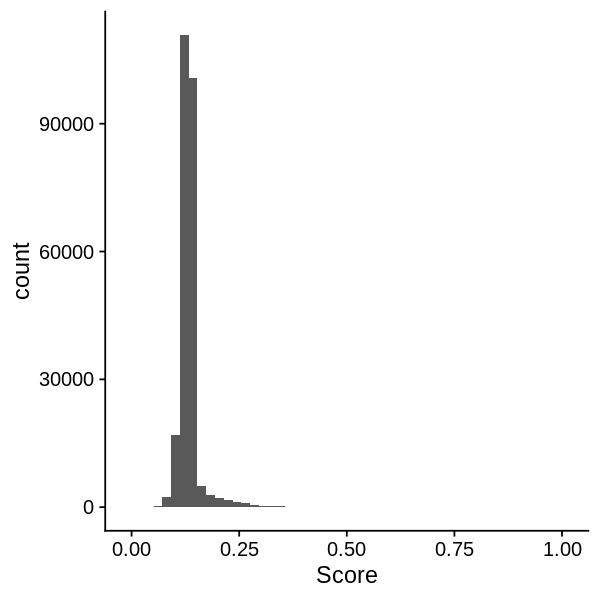

In [50]:
dat = dat_peak_merge %>% dplyr::mutate(Score = Input_Score)
gpt = ggplot(dat, aes(x=Score)) + geom_histogram(bins=50) + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [51]:
dat = dat_peak_merge
dat = dat %>% dplyr::slice_sample(n = 1000)
dat = dat %>% 
    dplyr::mutate(
        Name  = "Input",
        Score = Input_Score
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)

gpt = ggplot(dat, aes(x=Peak, y=Score, group = 1)) +
        geom_line() +
        labs(x="", y="Input Score") +
        theme_cowplot() +
        theme(axis.text.x  = element_blank(),
              axis.text.y  = element_text(size=10),
              axis.ticks.x = element_blank(),
              axis.title.y = element_text(size=20))

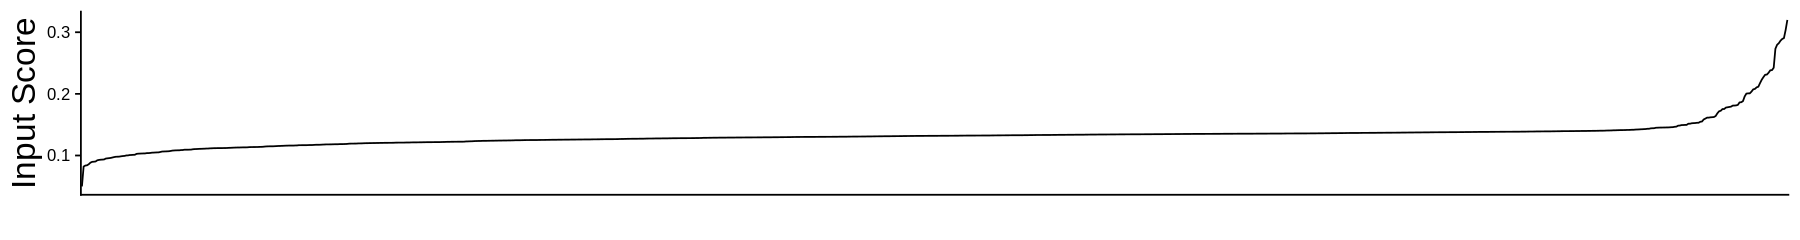

In [52]:
options(repr.plot.height=2, repr.plot.width=15)
print(gpt)

In [53]:
dat = dat_peak_merge
dat = dat %>% 
    dplyr::mutate(
        Name  = "Input",
        Score = Input_Score,
        Annot = "CTCF",
        Label = CTCF
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)

vec = c("1" = "black", "0" = "white")
gpt = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = vec) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=30),
              axis.ticks.x = element_blank(),
              legend.position = "bottom",
              legend.key.size = unit(1, 'cm'),
              legend.title = element_text(size=20),
              legend.text = element_text(size=10))

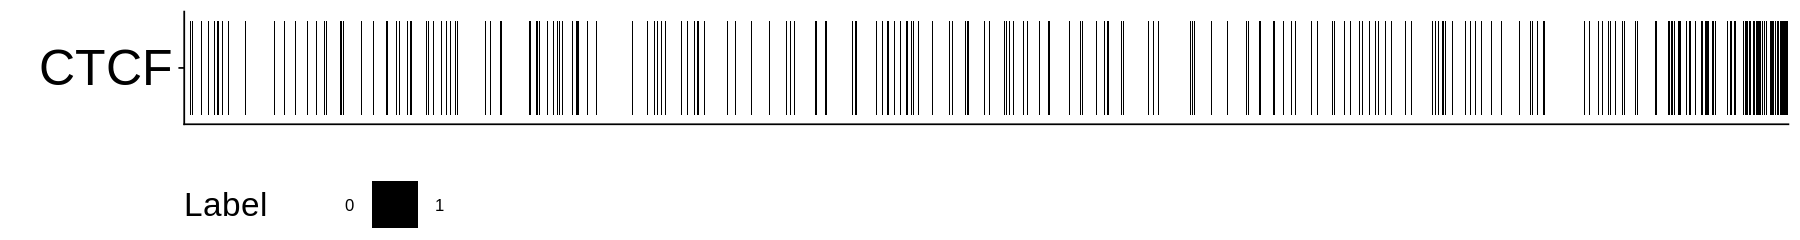

In [54]:
options(repr.plot.height=2, repr.plot.width=15)
print(gpt)

## Plot

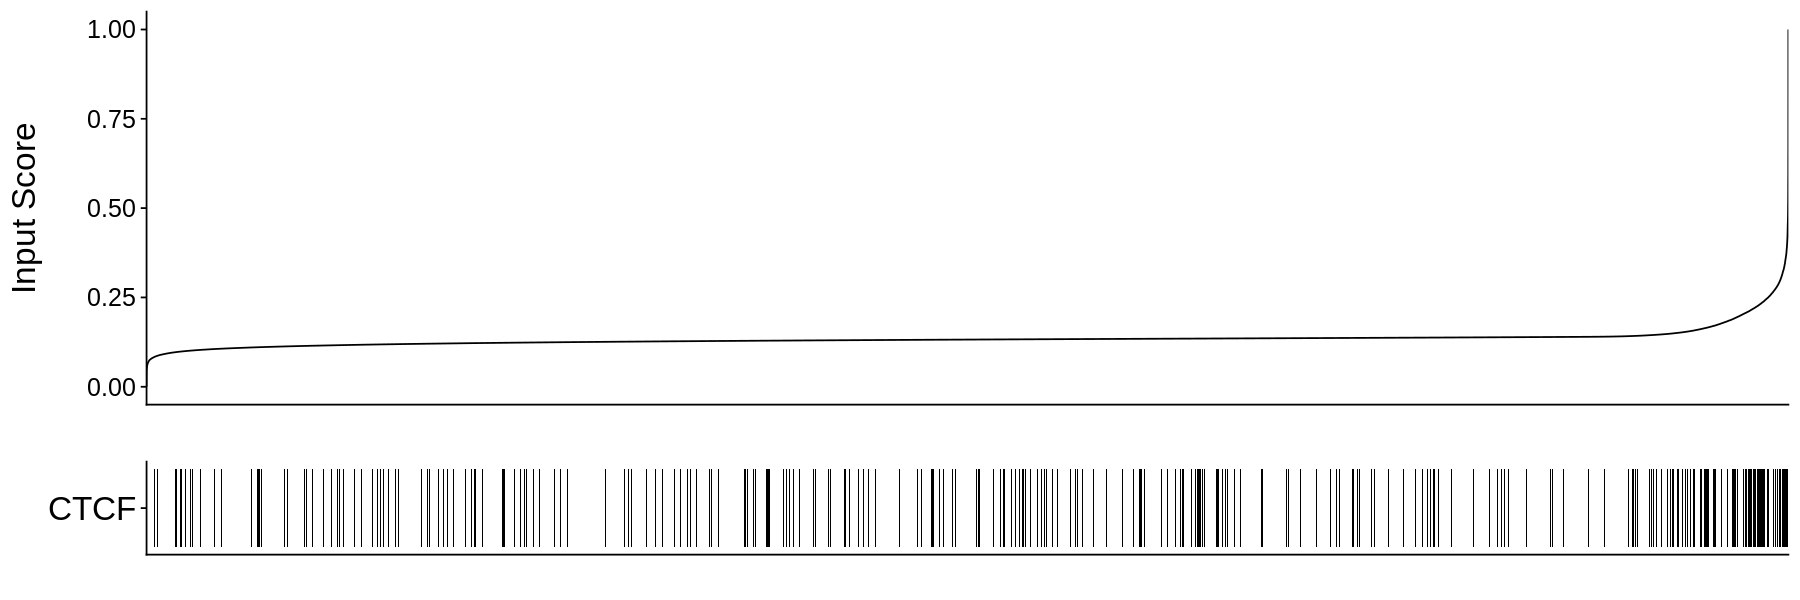

In [55]:
dat = dat_peak_merge
dat = dat %>% 
    dplyr::mutate(
        Score = Input_Score,
        Annot = "CTCF",
        Label = CTCF
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)


gp1 = ggplot(dat, aes(x=Peak, y=Score, group = 1)) +
        geom_line() +
        labs(x="", y="Input Score") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=15),
              axis.ticks.x = element_blank(),
              axis.title.y = element_text(size=20))

vec = c("1" = "black", "0" = "white")
gp2 = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = vec) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x  = element_blank(),
              axis.text.y  = element_text(size=20),
              axis.ticks.x = element_blank(),
              legend.position = "none")

options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp1, gp2, 
    ncol  = 1,
    align = "v",
    rel_heights = c(3, 1))

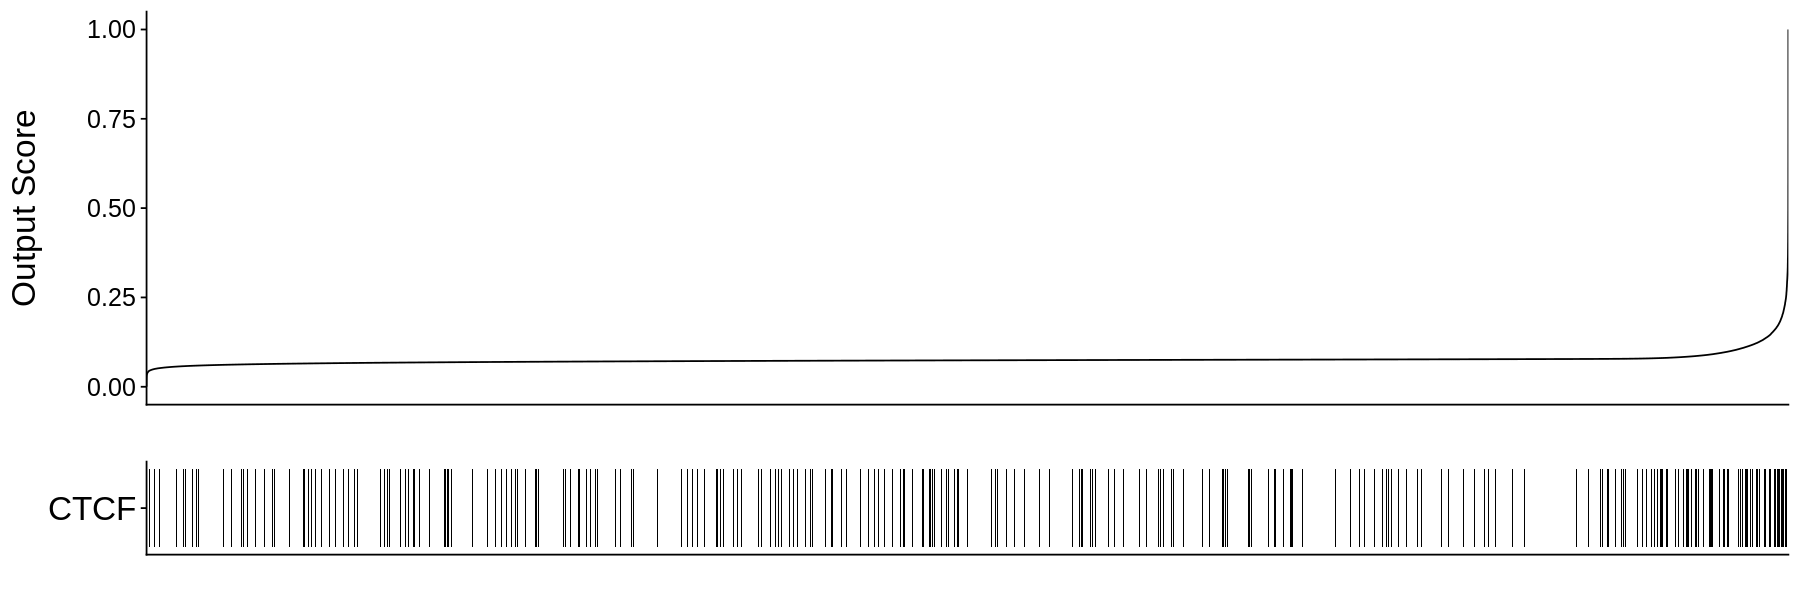

In [56]:
dat = dat_peak_merge
dat = dat %>% 
    dplyr::mutate(
        Score = Output_Score,
        Annot = "CTCF",
        Label = CTCF
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)


gp1 = ggplot(dat, aes(x=Peak, y=Score, group = 1)) +
        geom_line() +
        labs(x="", y="Output Score") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=15),
              axis.ticks.x = element_blank(),
              axis.title.y = element_text(size=20))

vec = c("1" = "black", "0" = "white")
gp2 = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = vec) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x  = element_blank(),
              axis.text.y  = element_text(size=20),
              axis.ticks.x = element_blank(),
              legend.position = "none")

options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp1, gp2, 
    ncol  = 1,
    align = "v",
    rel_heights = c(3, 1))

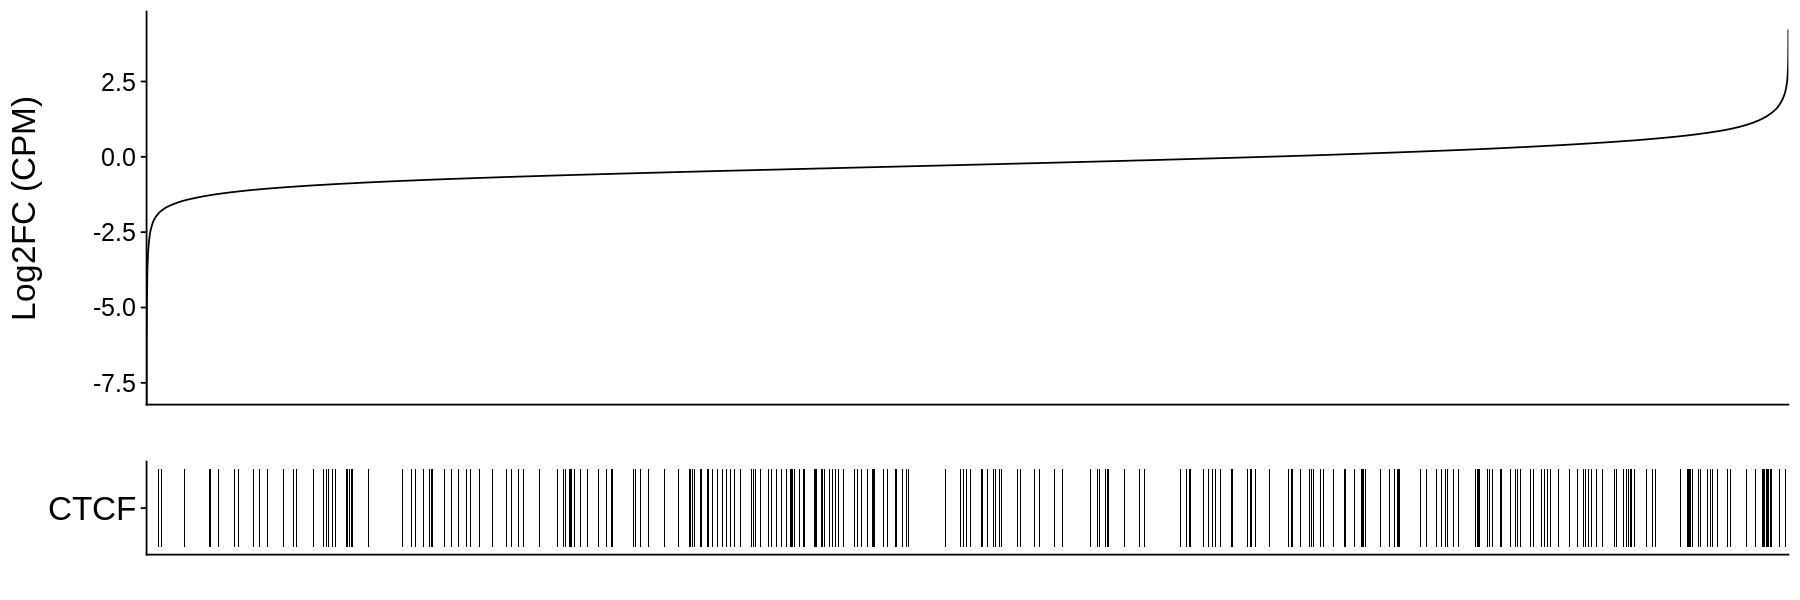

In [57]:
dat = dat_peak_merge
dat = dat %>% 
    dplyr::mutate(
        Score = Log2FC,
        Annot = "CTCF",
        Label = CTCF
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)


gp1 = ggplot(dat, aes(x=Peak, y=Score, group = 1)) +
        geom_line() +
        labs(x="", y="Log2FC (CPM)") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=15),
              axis.ticks.x = element_blank(),
              axis.title.y = element_text(size=20))

vec = c("1" = "black", "0" = "white")
gp2 = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = vec) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x  = element_blank(),
              axis.text.y  = element_text(size=20),
              axis.ticks.x = element_blank(),
              legend.position = "none")

options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp1, gp2, 
    ncol  = 1,
    align = "v",
    rel_heights = c(3, 1))

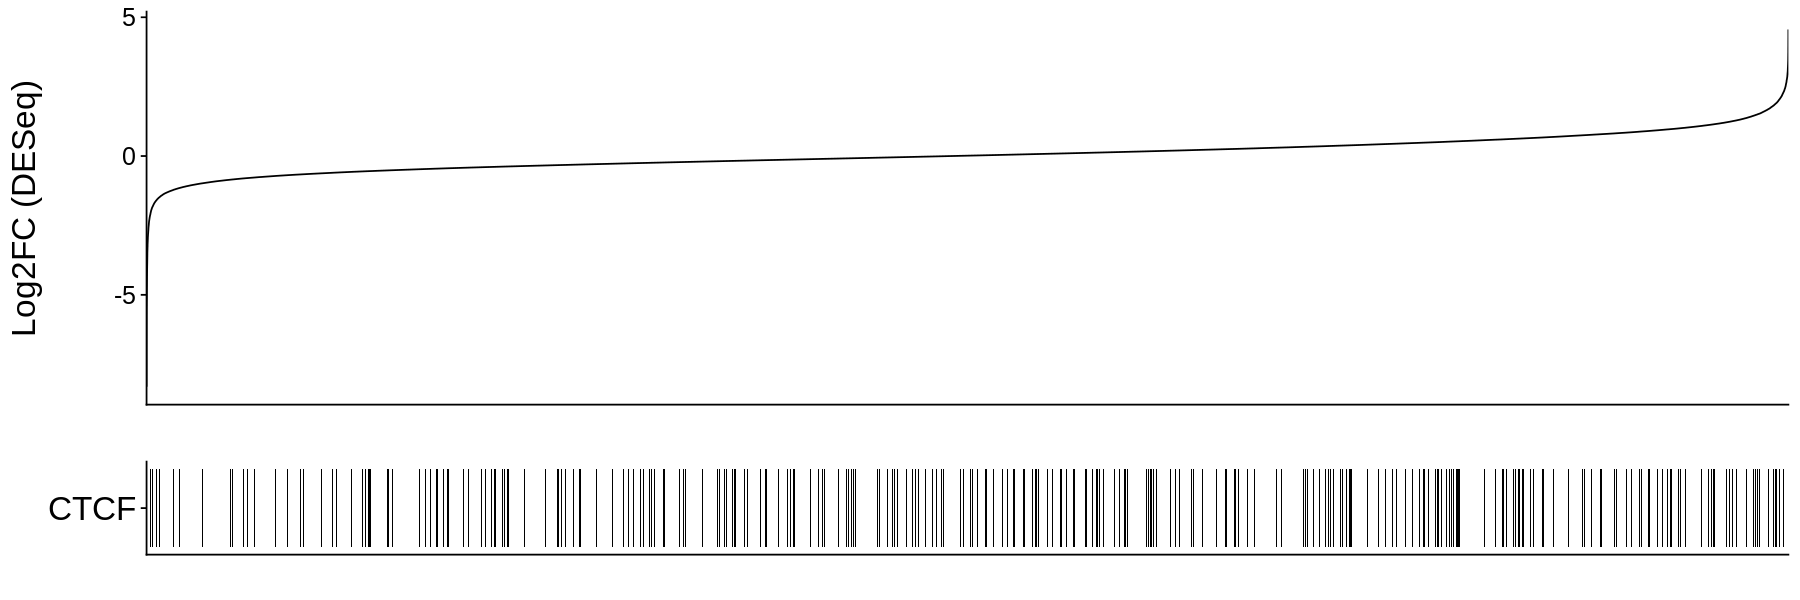

In [58]:
dat = dat_peak_merge
dat = dat %>% 
    dplyr::mutate(
        Score = log2FoldChange,
        Annot = "CTCF",
        Label = CTCF
    ) %>% 
    dplyr::arrange(Score)
dat$Peak = factor(dat$Peak, levels=dat$Peak)


gp1 = ggplot(dat, aes(x=Peak, y=Score, group = 1)) +
        geom_line() +
        labs(x="", y="Log2FC (DESeq)") +
        theme_cowplot() +
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=15),
              axis.ticks.x = element_blank(),
              axis.title.y = element_text(size=20))

vec = c("1" = "black", "0" = "white")
gp2 = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
        geom_tile() +
        scale_fill_manual(values = vec) +
        labs(x="", y="") +
        theme_cowplot() +
        theme(axis.text.x  = element_blank(),
              axis.text.y  = element_text(size=20),
              axis.ticks.x = element_blank(),
              legend.position = "none")

options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp1, gp2, 
    ncol  = 1,
    align = "v",
    rel_heights = c(3, 1))